In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive')
sales = pd.read_csv('/content/drive/My Drive/IIR_orientation/HW1/sales_train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


## 以下圖表找出item_cnt_day這個欄位資料的異常值
#### 可以發現: 有一個大於2000的異常值

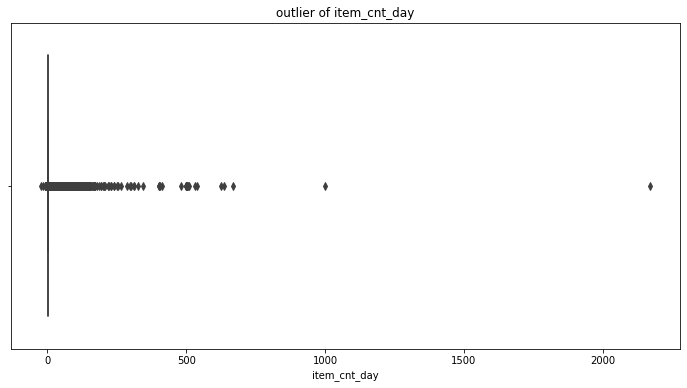

In [4]:
plt.figure(figsize=(12,6))
plt.title('outlier of item_cnt_day')
sns.boxplot(x=sales.item_cnt_day)

## 以下圖表找出item_price這個欄位資料的異常值
#### 可以發現: 有一個大於300000的異常值

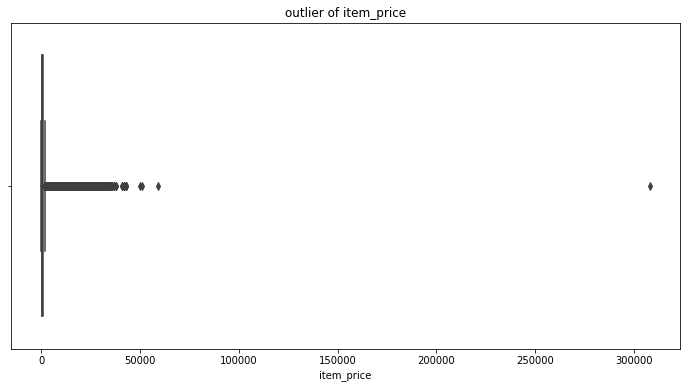

In [5]:
plt.figure(figsize=(12,6))
plt.title('outlier of item_price')
sns.boxplot(x=sales.item_price)

In [6]:
sales['month']=sales['date_block_num']%12 + 1
sales['price_day']=sales['item_price']*sales['item_cnt_day']

In [7]:
sales_2013 = sales.loc[sales.date_block_num < 12]
sales_2013

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,price_day
0,02.01.2013,0,59,22154,999.00,1.0,1,999.00
1,03.01.2013,0,25,2552,899.00,1.0,1,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,1,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1,1099.00
...,...,...,...,...,...,...,...,...
1267557,06.12.2013,11,46,5671,2690.00,1.0,12,2690.00
1267558,01.12.2013,11,46,5671,2590.00,3.0,12,7770.00
1267559,26.12.2013,11,46,5669,2690.00,2.0,12,5380.00
1267560,25.12.2013,11,46,5669,2690.00,1.0,12,2690.00


In [8]:
sales_2014 = sales.loc[(sales.date_block_num>=12) & (sales.date_block_num<24)]
sales_2014

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,price_day
1267562,02.01.2014,12,54,10297,749.0,1.0,1,749.0
1267563,10.01.2014,12,54,10297,749.0,1.0,1,749.0
1267564,24.01.2014,12,54,10297,749.0,1.0,1,749.0
1267565,24.01.2014,12,54,10296,1599.0,1.0,1,1599.0
1267566,31.01.2014,12,54,10297,749.0,1.0,1,749.0
...,...,...,...,...,...,...,...,...
2323418,11.12.2014,23,25,5037,2599.0,1.0,12,2599.0
2323419,28.12.2014,23,25,5037,1999.0,2.0,12,3998.0
2323420,03.12.2014,23,25,5038,2999.0,1.0,12,2999.0
2323421,06.12.2014,23,25,5033,1199.0,1.0,12,1199.0


In [9]:
sales_2015 = sales.loc[sales.date_block_num>=24]
sales_2015

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,price_day
2323423,07.01.2015,24,27,20463,1999.0,1.0,1,1999.0
2323424,02.01.2015,24,27,20462,1549.0,1.0,1,1549.0
2323425,25.01.2015,24,27,20448,399.0,1.0,1,399.0
2323426,24.01.2015,24,27,20448,399.0,1.0,1,399.0
2323427,04.01.2015,24,27,20417,1499.0,1.0,1,1499.0
...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.0,1.0,10,299.0
2935845,09.10.2015,33,25,7460,299.0,1.0,10,299.0
2935846,14.10.2015,33,25,7459,349.0,1.0,10,349.0
2935847,22.10.2015,33,25,7440,299.0,1.0,10,299.0


In [10]:
itemCnt_per_month_2013 = sales_2013.groupby(['month'])['item_cnt_day'].sum()
totalPrice_per_month_2013 = sales_2013.groupby(['month'])['price_day'].sum()

itemCnt_per_month_2014 = sales_2014.groupby(['month'])['item_cnt_day'].sum()
totalPrice_per_month_2014 = sales_2014.groupby(['month'])['price_day'].sum()

itemCnt_per_month_2015 = sales_2015.groupby(['month'])['item_cnt_day'].sum()
totalPrice_per_month_2015 = sales_2015.groupby(['month'])['price_day'].sum()

## 以下圖表為不同年份每個月的銷售物品量分佈取線圖
#### 可以發現:
- 銷售物品量逐年遞減
- 在年末的時候銷售物品量遞增，尤其在12月有顯著的增加

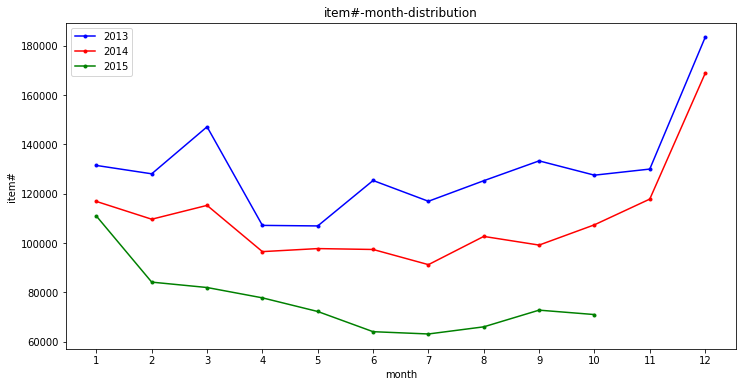

In [11]:
plt.figure(figsize=(12,6))
plt.title('item#-month-distribution')
plt.xlabel('month')
plt.ylabel('item#')
plt.xticks(list(range(1,13)))

plt.plot(itemCnt_per_month_2013, 'b.-',label='2013')
plt.plot(itemCnt_per_month_2014, 'r.-',label='2014')
plt.plot(itemCnt_per_month_2015, 'g.-',label='2015')
plt.legend()
plt.show()


## 以下圖表為不同年份每個月的銷售金額分佈取線圖
#### 可以發現:
- 銷售金額的分布並不完全跟銷售量為正相關
- 在年末的時候銷售額遞增，尤其在12月有顯著的增加

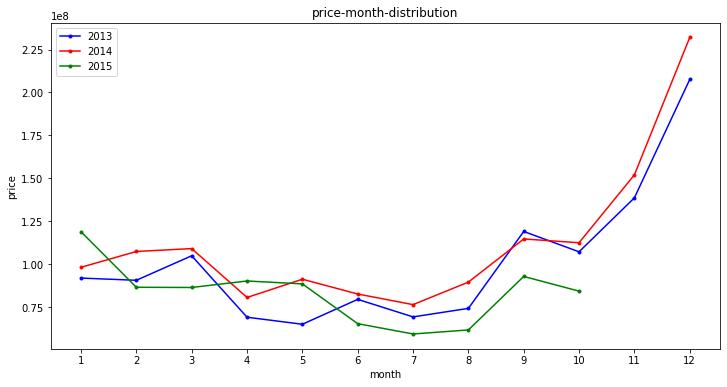

In [12]:
plt.figure(figsize=(12,6))
plt.title('price-month-distribution')
plt.xlabel('month')
plt.ylabel('price')
plt.xticks(list(range(1,13)))

plt.plot(totalPrice_per_month_2013, 'b.-',label='2013')
plt.plot(totalPrice_per_month_2014, 'r.-',label='2014')
plt.plot(totalPrice_per_month_2015, 'g.-',label='2015')
plt.legend()
plt.show()


# 了解使用的函數
- pd.read_csv: 讀取csv檔
- plt.figure: 設畫架板, 參數中的figsize可設畫架板大小
- plt.title: 設定圖像標題
- plt.xlabel: 設定圖像x軸名稱
- plt.ylabel: 設定圖像y軸名稱
- plt.xticks: 調整x軸的刻度
- plt.plot: 畫圖
- plt.legend: 設置圖例
- plt.show: 顯示圖像
- sns.boxplot: 畫箱型圖
- df['new_col']=df['col_a'] * df['col_b']: 拿原本的欄位做計算得到新的欄位
- df.loc[df.col under certain condition]: 根據欄位篩選出特定條件的行數資料
- df.groupby(['col_a'])['col_b'].sum(): 相同欄位a形成一組, 並將欄位b的值相加